# HBS Case

*Dimensional Fund Advisors, 2002 [HBS 9-203-026].
Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.*

## 1. READING - DFA’s Strategy
1. Investment philosophy.
* In 100 words or less, describe DFA’s belief about how to find premium in the market.

* To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

* Are DFA’s funds active or passive?

* What do DFA and others mean by a “value” stock? And a “growth” stock?

1.1.a

As per the case, DFA believes that small cap stock performs well compared to large cap stock. In the small cap too, value stocks perform better than the growth stocks.

1.1.b

Their strategy is based on the assumption that the markets are efficient and the fundamental analysis is what drives the prices of the equity stocks. They do not rely much on the individual equity analysis.

1.1.c

DFA funds are passively managed, i.e., the positions or holdings in the individual stocks do not change much.

1.1.d

Value stocks are the ones with high book to market share price ratio, whereas Growth stocks are the ones with low book to market share price ratio

## 2. Challenges for DFA’s view.
* What challenge did DFA’s model see in the 1980’s?

* And in the 1990’s?

In the 1980s and 1990s the small cap stocks had poorer performance than the large cap stocks. And DFA's investment philosophy of picking the small cap stocks and generating higher returns was not possible to achieve in this period.

## 3. The market.
* Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered ``large cap”? What percent of the market value do they account for?

* Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?

1.3.a

There are 207 large cap stocks out of 5020 firms. They represent 70% of the overall market value

1.3.b



# 2. The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a size and value factor. Note that these three factors are already listed as excess returns.

## Data
* Use the data found in data/dfa_analysis_data.xlsx.

* Monthly excess return data for the overall equity market,
.

* The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate.

* You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

Source:
Ken French library, accessible through the pandas-datareader API.

## 1. The Factors
Calculate their univariate performance statistics:

* mean

* volatility

* Sharpe

* VaR(.05)

Report these for the following three subsamples:

* Beginning - 1980

* 1981 - 2001

* 2002 - End

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import less_equal

data = pd.read_excel("dfa_analysis_data.xlsx", sheet_name="factors", index_col='Date')
print(data.head())

            Mkt-RF     SMB     HML      RF
Date                                      
1926-07-31  0.0289 -0.0255 -0.0239  0.0022
1926-08-31  0.0264 -0.0114  0.0381  0.0025
1926-09-30  0.0038 -0.0136  0.0005  0.0023
1926-10-31 -0.0327 -0.0014  0.0082  0.0032
1926-11-30  0.0254 -0.0011 -0.0061  0.0031


In [79]:
# factor univariate statistics
FREQ = 12
univariate_statistics = {}
for factor in data.columns:
    if factor == "RF":
        continue
    df = data[factor]
    mean = df.mean() * FREQ
    vol = df.std() * np.sqrt(FREQ)
    SR = mean/vol
    VaR = df.quantile(0.05)
    univariate_statistics[factor] = [mean, vol, SR, VaR]

stats = pd.DataFrame(univariate_statistics, index = ['Mean', 'Vol', 'Sharpe Ratio', 'VaR(0.05)']).T
display(stats.style.format({
    'Mean': '{:.2f}',
    'Vol': '{:.2f}',
    'Sharpe Ratio': '{:.2f}',
    'VaR(0.05)': '{:.3f}'
}))


,Mean,Vol,Sharpe Ratio,VaR(0.05)
Mkt-RF,0.08,0.18,0.45,-0.079
SMB,0.02,0.11,0.18,-0.042
HML,0.04,0.12,0.34,-0.042


In [80]:
from datetime import datetime
start_date = data.index[0]
end_date = data.index[-1]
periods = [(start_date, pd.Timestamp(datetime(1980, 12, 31))),
           (pd.Timestamp(datetime(1981, 1, 1)),pd.Timestamp(datetime(2001, 12, 31))),
           (pd.Timestamp(datetime(2002, 1, 1)), end_date)]
period_descriptions = ["Beginning - 1980", "1981 - 2001", "2002 - End"]

dfs = []
for period, description in zip(periods, period_descriptions):
    univariate_statistics = {}
    for factor in data.columns:
        if factor == "RF":
            continue
        df = data.loc[period[0]:period[1], factor]
        mean = df.mean() * FREQ
        vol = df.std() * np.sqrt(FREQ)
        SR = mean/vol
        VaR = df.quantile(0.05)
        univariate_statistics[factor] = [mean, vol, SR, VaR, description]
    stats = pd.DataFrame(univariate_statistics, index = ['Mean', 'Vol', 'Sharpe Ratio', 'VaR(0.05)', 'period']).T
    dfs.append(stats)


# display(dfs[0])
overall_df = pd.concat(dfs)
# display(overall_df)
multiIndex_overall_df = overall_df.set_index("period", append=True).swaplevel(0,1)
display(multiIndex_overall_df.style.format({
    'Mean': '{:.2f}',
    'Vol': '{:.2f}',
    'Sharpe Ratio': '{:.2f}',
    'VaR(0.05)': '{:.3f}'
}))

In [81]:
a = pd.Timestamp(1980, 12, 31)
print(a)
print(type(a))

1980-12-31 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## 2.
Based on the factor statistics above, answer the following.

* Does each factor have a premium (positive expected excess return) in each subsample?

* Does the premium to the size factor get smaller after 1980?

* Does the premium to the value factor get smaller during the 1990’s?

* How have the factors performed since the time of the case, (2002-present)?

In [82]:
years = [ 1920 + i * 10 for i in range(11)]
periods = [[pd.Timestamp(year, 1, 1), pd.Timestamp(year+9, 12, 31)] for year in years]

period_wise_dfs = []

for i in range(len(periods)):
    period = periods[i]
    cur_start_date = period[0]
    cur_end_date = period[1]
    if start_date > cur_start_date:
        cur_start_date = start_date
        periods[i][0] = start_date
    if cur_end_date > end_date:
        periods[i][1] = end_date
        cur_end_date = end_date

    period_description = f'{cur_start_date.strftime('%Y-%m-%d')} - {cur_end_date.strftime('%Y-%m-%d')}'
    factor_period_statistics = {}
    for factor in data.columns:
        if factor == "RF":
            continue
        period_factor_df = data.loc[period[0]:period[1], factor]
        mean = period_factor_df.mean() * FREQ
        vol = period_factor_df.std() * np.sqrt(FREQ)
        SR = mean/vol
        VaR = period_factor_df.quantile(0.05)
        factor_period_statistics[factor] = [mean, vol, SR, VaR, period_description]

    cur_period_df = pd.DataFrame(factor_period_statistics, index = ['Mean', 'Vol', 'Sharpe Ratio', 'VaR(0.05)', 'period']).T
    period_wise_dfs.append(cur_period_df)

multiIndex_overall_df2 = pd.concat(period_wise_dfs).set_index("period", append=True).swaplevel(0,1)
display(multiIndex_overall_df2.style.format({
    'Mean': '{:.2f}',
    'Vol': '{:.2f}',
    'Sharpe Ratio': '{:.2f}',
    'VaR(0.05)': '{:.3f}'
}))


2.2.1

The SMB factor doesn't have premium in the 1981 - 2001 period. Other than this factor in the mentioned period, we have premium for each factor in each period.

2.2.2
Yes, size factor's premium is decreased after 1980

2.2.3
Compared to the decades prior to 1990's, the value factors premium is negligible at 0.01

2.2.4
Comparing the periods Beginning - 1980, 1980 - 2002, 2002 - present. The factors SMB, HML performance measured by the premium and the SR are low.


## 3.
The factors are constructed in such a way as to reduce correlation between them.

* Report the correlation matrix across the three factors.

* Does the construction method succeed in keeping correlations small?

* Does it achieve this in each subsample?

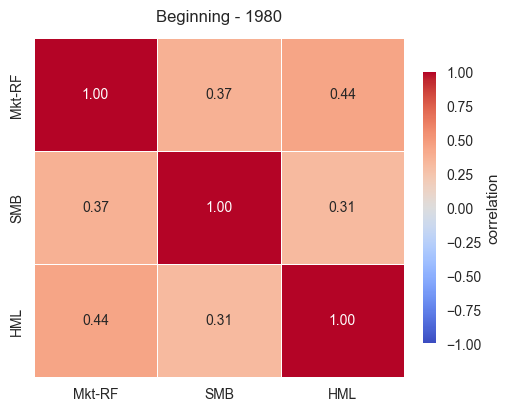

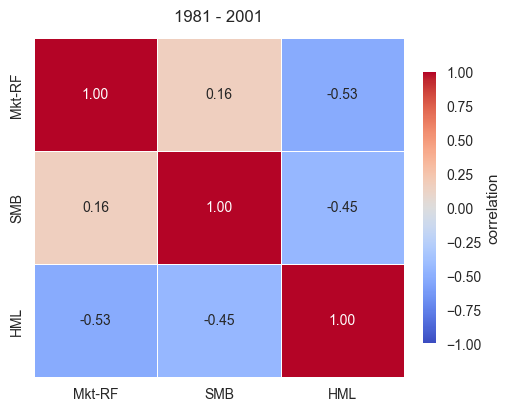

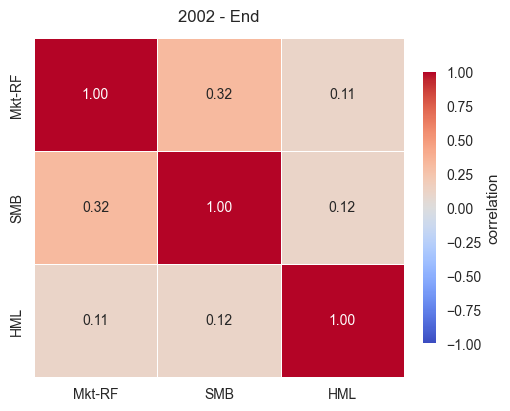

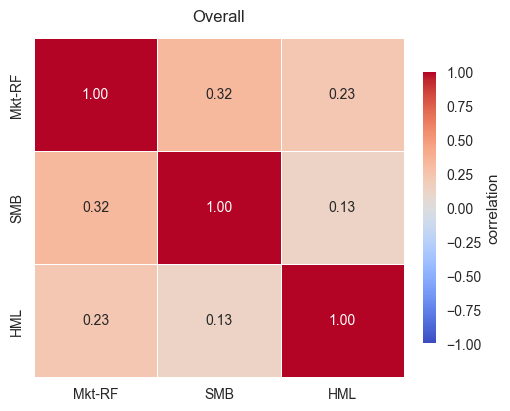

In [83]:

periods = [(start_date, pd.Timestamp(datetime(1980, 12, 31))),
           (pd.Timestamp(datetime(1981, 1, 1)),pd.Timestamp(datetime(2001, 12, 31))),
           (pd.Timestamp(datetime(2002, 1, 1)), end_date)]
period_descriptions = ["Beginning - 1980", "1981 - 2001", "2002 - End"]

def plot_correlation(df, title = "Correlation"):
    plt.style.use("seaborn-v0_8")

    # df: your DataFrame of numeric columns
    corr = df.corr(method="pearson")  # or 'spearman'/'kendall'

    # # mask upper triangle (optional for readability)
    # mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(5, 4), constrained_layout=True)
    sns.heatmap(
        corr,
        # mask=mask,                # remove if you want full matrix
        cmap="coolwarm",          # try 'vlag', 'icefire', 'rocket'
        vmin=-1, vmax=1, center=0,
        annot=True,               # set False for speed on large matrices
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "correlation"},
        ax=ax
    )
    ax.set_title(title, pad=12)
    plt.show()

# required_cols =
sub_data = data[[col for col in data.columns if col != "RF"]]
for i, period in enumerate(periods):

    period_df = sub_data.loc[period[0]:period[1]]
    plot_correlation(period_df, title=period_descriptions[i])

plot_correlation(sub_data, title="Overall")


2.3.1, 2.3.2, 2.3.3

Correlation structure for the entire time period is such that the cross factor correlation is less.
But for the subsamples, the correlation of HML factor with the excess market returns factor  and HML factor returns are highest in the period 1981 - 2002. Other than this, the construction method succeeds in keeping correlations small.

## 4.
Plot the cumulative returns of the three factors.

* Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

<Axes: title={'center': 'Cumulative Returns - entire period'}, xlabel='Date'>

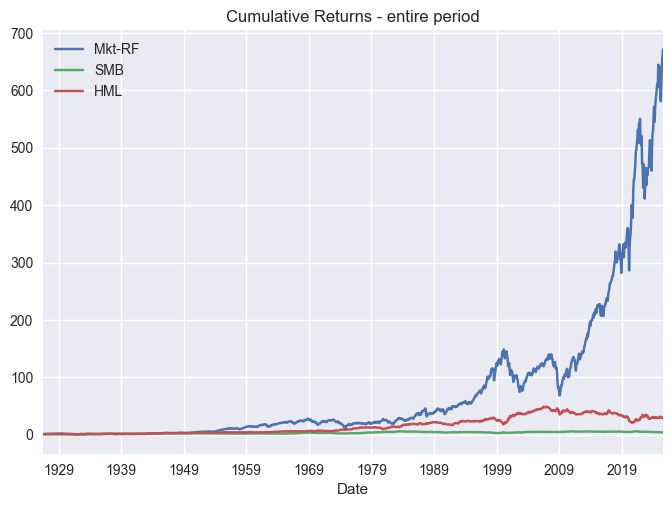

In [84]:
cum_rets = (sub_data+1).cumprod()

cum_rets.plot(title="Cumulative Returns - entire period")

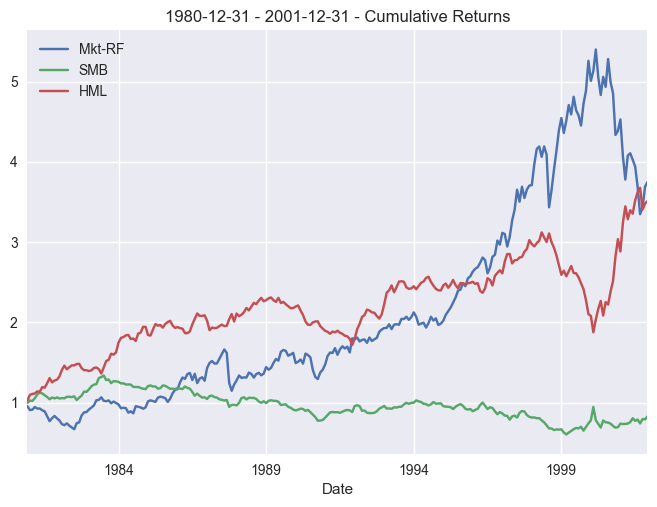

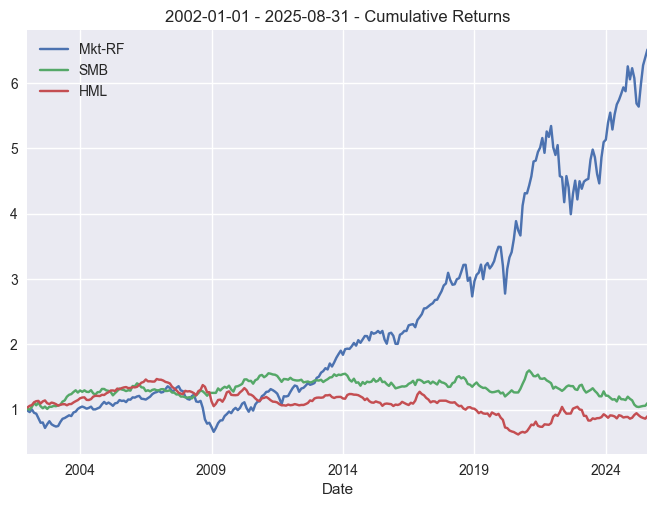

In [85]:
periods = [[pd.Timestamp(1980, 12, 31), pd.Timestamp(2001, 12, 31)], [pd.Timestamp(2002, 1, 1), end_date]]

for period in periods:
    period_df = sub_data.loc[period[0]:period[1]]
    cum_rets_period = (1+period_df).cumprod()
    cum_rets_period.plot(title=f"{period[0].strftime('%Y-%m-%d')} - {period[1].strftime('%Y-%m-%d')} - Cumulative Returns")


## 5.
* Does it appear that all three factors were valuable in 1981-2001?

* And post-2001?

Would you advise DFA to continue emphasizing all three factors?

Indeed, the factors appear to be valuable from 1981-2001. Their performance is negligible in the period 2002-present.

DFA should stop emphasizing the SMB, HML factors looking at their performance for the past 24 years.

## 3. CAPM
DFA believes that premia in stocks and stock portfolios is related to the three factors.

Let’s test 25 equity portfolios that span a wide range of size and value measures.

### Footnote
For more on the portfolio construction, see the description at Ken French’s data library. https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html

### Portfolios
Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as
, for n = 1, ... , 25.

* Note that while the factors were given as excess returns, the portfolios are total returns.

* For this entire problem, focus on the 1981-Present subsample.

### 1. Summary Statistics.
For each portfolio,

* Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.

* Calculate the (annualized) univariate statistics from 1.1.

In [86]:
from _ast import Assert

rf = data[['RF']]
stock_data = pd.read_excel("dfa_analysis_data.xlsx", sheet_name="portfolios (total returns)", index_col='Date')
assert (rf.index==stock_data.index).all(), "Dates vary across rf data and stock data"

stock_data['RF'] = rf

for col in stock_data.columns:
    if col != "RF":
        stock_data[col] = stock_data[col] - stock_data['RF']

display(stock_data.head())

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,RF
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056076,-0.019206,0.002918,-0.023677,0.017383,0.009918,0.021907,0.003856,-0.028282,-0.006727,...,0.013260,0.011189,0.000565,0.022478,0.031048,0.058709,0.018085,0.029063,0.003423,0.0022
1926-08-31,-0.022706,-0.082782,0.011468,0.018983,0.082604,0.021120,-0.010025,0.036484,-0.000201,0.060437,...,0.036087,0.017238,0.018836,0.050922,0.007669,0.039475,0.017269,0.052424,0.075076,0.0025
1926-09-30,-0.050591,-0.029106,-0.045717,-0.034983,0.006286,-0.029149,-0.007552,0.008489,-0.035177,-0.011719,...,-0.007546,-0.020024,0.012506,0.006430,-0.015251,0.034310,-0.000916,-0.009797,-0.026584,0.0023
1926-10-31,-0.096833,-0.038719,-0.038224,0.031213,-0.028652,-0.031214,-0.047391,-0.053967,-0.083471,-0.016413,...,-0.029728,-0.024258,-0.035732,-0.056725,-0.030582,-0.033261,-0.025667,-0.049925,-0.061329,0.0032
1926-11-30,0.052788,0.038777,0.021284,-0.047595,0.002010,0.027923,-0.020417,0.027325,0.046438,0.024192,...,0.020723,0.034215,0.048002,0.015113,0.041231,0.022255,0.012180,0.033496,0.022536,0.0031


In [87]:
# Assume `data` has column 'RF' indexed by Date and `stock_data` read from Excel with Date index

rf = data['RF']                     # Series aligned by Date
stock_data = pd.read_excel(
    "dfa_analysis_data.xlsx",
    sheet_name="portfolios (total returns)",
    index_col="Date",
)

# Ensure indexes match exactly (order and values)
pd.testing.assert_index_equal(rf.index, stock_data.index)

# Add RF as a column (optional)
stock_data = stock_data.assign(RF=rf)

# Subtract RF from every return column except 'RF' itself
cols = stock_data.columns.difference(['RF'])
stock_data[cols] = stock_data[cols].sub(stock_data['RF'], axis=0)

display(stock_data.head())


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,RF
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056076,-0.019206,0.002918,-0.023677,0.017383,0.009918,0.021907,0.003856,-0.028282,-0.006727,...,0.013260,0.011189,0.000565,0.022478,0.031048,0.058709,0.018085,0.029063,0.003423,0.0022
1926-08-31,-0.022706,-0.082782,0.011468,0.018983,0.082604,0.021120,-0.010025,0.036484,-0.000201,0.060437,...,0.036087,0.017238,0.018836,0.050922,0.007669,0.039475,0.017269,0.052424,0.075076,0.0025
1926-09-30,-0.050591,-0.029106,-0.045717,-0.034983,0.006286,-0.029149,-0.007552,0.008489,-0.035177,-0.011719,...,-0.007546,-0.020024,0.012506,0.006430,-0.015251,0.034310,-0.000916,-0.009797,-0.026584,0.0023
1926-10-31,-0.096833,-0.038719,-0.038224,0.031213,-0.028652,-0.031214,-0.047391,-0.053967,-0.083471,-0.016413,...,-0.029728,-0.024258,-0.035732,-0.056725,-0.030582,-0.033261,-0.025667,-0.049925,-0.061329,0.0032
1926-11-30,0.052788,0.038777,0.021284,-0.047595,0.002010,0.027923,-0.020417,0.027325,0.046438,0.024192,...,0.020723,0.034215,0.048002,0.015113,0.041231,0.022255,0.012180,0.033496,0.022536,0.0031


In [88]:
univariate_statistics = {}
period = [pd.Timestamp(1981, 1, 1), end_date]
stock_data = stock_data.loc[period[0]:, cols]
# stock_data = stock_data[cols]

mean = stock_data.mean() * FREQ
vol = stock_data.std() * np.sqrt(FREQ)
SR = mean/vol
VaR = stock_data.quantile(0.05)

univariate_statistics = {'Mean': mean, 'Vol':vol, 'Sharpe Ratio': SR, 'VaR(0.05)': VaR}
stats_df = pd.DataFrame(univariate_statistics, index = cols)
stats_df = stats_df.sort_values(by=['Sharpe Ratio'], ascending = False)

print('Univariate Statistics for the stocks (Annualized)')
display(stats_df.style.format({
    'Mean': '{:.2f}',
    'Vol': '{:.2f}',
    'Sharpe Ratio': '{:.2f}',
    'VaR(0.05)': '{:.3f}'
}))


Univariate Statistics for the stocks (Annualized)


,Mean,Vol,Sharpe Ratio,VaR(0.05)
SMALL HiBM,0.13,0.21,0.61,-0.089
ME3 BM5,0.12,0.20,0.60,-0.085
ME2 BM4,0.11,0.18,0.60,-0.075
BIG LoBM,0.10,0.16,0.59,-0.075
ME4 BM4,0.10,0.17,0.59,-0.069
ME3 BM4,0.11,0.18,0.58,-0.073
ME1 BM4,0.11,0.19,0.58,-0.078
ME5 BM2,0.09,0.16,0.57,-0.065
ME2 BM3,0.11,0.19,0.56,-0.080
ME3 BM2,0.11,0.19,0.56,-0.079


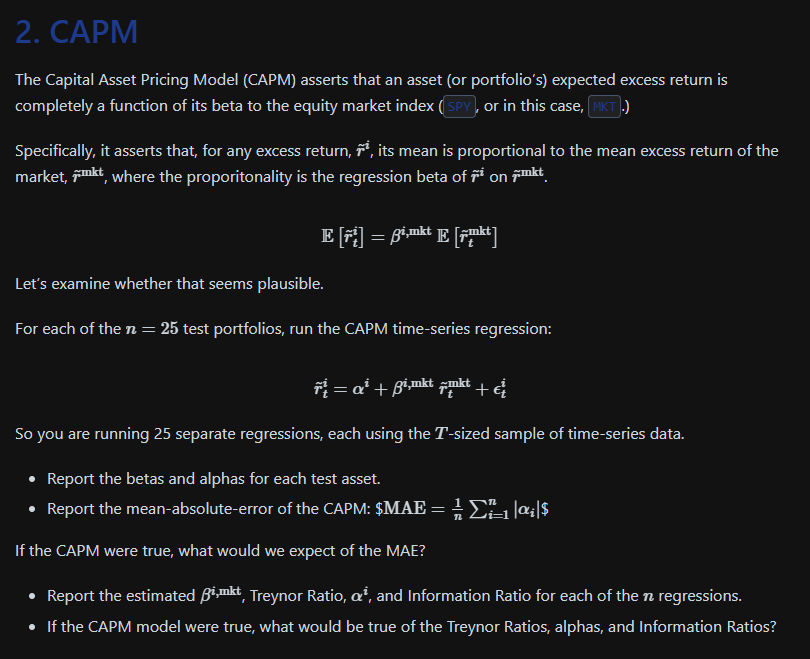
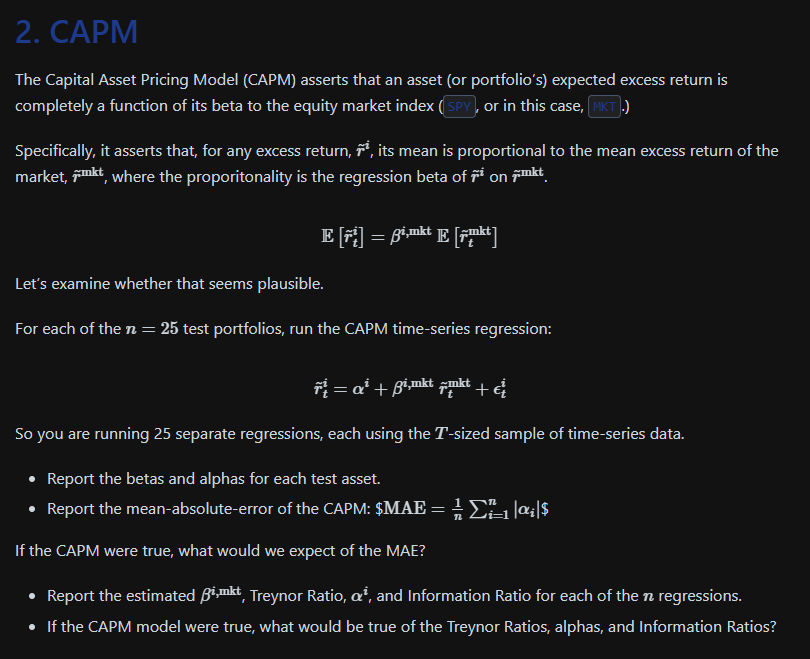

In [92]:
import statsmodels.api as sm
alphas, betas, standard_errors = [], [], []
residuals = []
treynor_ratios = []
information_ratios = []

spx = data.loc[period[0]:period[1], 'Mkt-RF']
X = sm.add_constant(spx)
for col in cols:
    y = stock_data[col]
    model = sm.OLS(y,X).fit()
    residuals.append(model.resid)
    standard_errors.append(residuals[-1].std())
    alpha, beta = model.params
    alphas.append(alpha)
    betas.append(beta)
    treynor_ratios.append(y.mean()/beta)
    information_ratios.append(alpha/standard_errors[-1])

model_df = pd.DataFrame({'alpha': alphas, 'beta': betas}, index = cols)
MAE = sum([abs(alpha) for alpha in alphas]) / len(alphas)

display(model_df.style.format({
    'alpha':'{:.2f}',
    'beta':'{:.2f}'
}))
print('MAE: {:.4f}'.format(MAE))


,alpha,beta
BIG HiBM,0.00,1.02
BIG LoBM,0.00,0.99
ME1 BM2,-0.00,1.17
ME1 BM3,0.00,1.06
ME1 BM4,0.00,0.98
ME2 BM1,-0.00,1.34
ME2 BM2,0.00,1.14
ME2 BM3,0.00,1.04
ME2 BM4,0.00,0.98
ME2 BM5,0.00,1.11


MAE: 0.0016


In [93]:
stats_df_regression = pd.DataFrame({'beta': betas, 'treynor ratio': treynor_ratios, 'alpha': alphas, 'information ratio': information_ratios}, index = cols)
display(stats_df_regression.style.format({
    'beta':'{:.2f}',
    'alpha':'{:.3f}',
    'treynor ratio':'{:.2f}',
    'information ratio':'{:.2f}'
}))

,beta,treynor ratio,alpha,information ratio
BIG HiBM,1.02,0.01,0.001,0.03
BIG LoBM,0.99,0.01,0.001,0.06
ME1 BM2,1.17,0.01,-0.001,-0.02
ME1 BM3,1.06,0.01,0.000,0.00
ME1 BM4,0.98,0.01,0.002,0.07
ME2 BM1,1.34,0.00,-0.004,-0.11
ME2 BM2,1.14,0.01,0.000,0.01
ME2 BM3,1.04,0.01,0.001,0.05
ME2 BM4,0.98,0.01,0.002,0.07
ME2 BM5,1.11,0.01,0.001,0.04


If CAPM were true, the MAE would be 0.

Treynor Ratios should be equal if CAPM holds and this should be equal to the expected market risk premium. Each alpha should be 0 according to the assumption that the asset excess returns are fully explained by the excess market returns. Information ratio should be 0 as there is no active return (alpha).

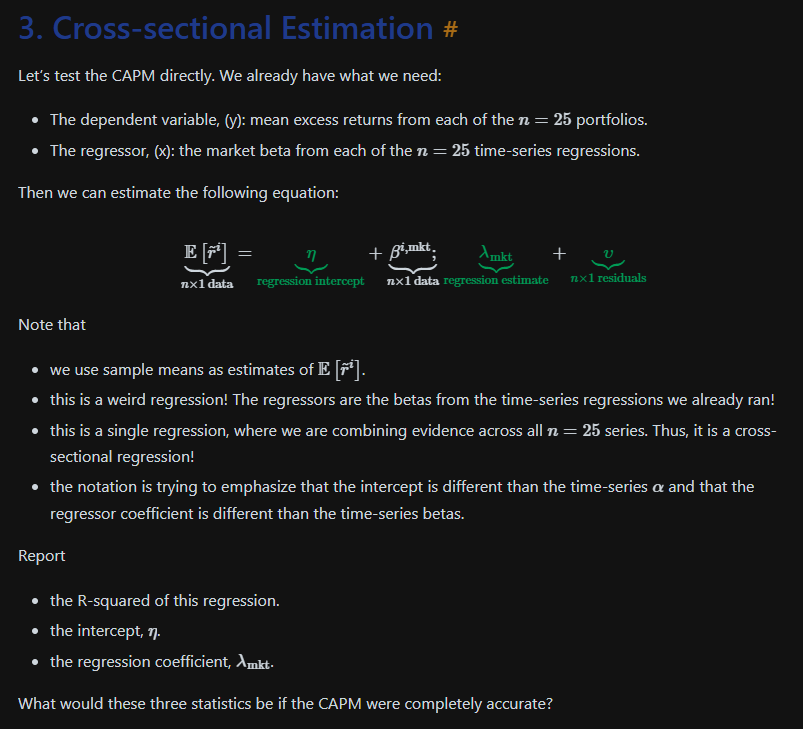

In [94]:
means = stock_data.mean() * FREQ
betas = pd.Series(betas, index = cols)
X = sm.add_constant(betas)
model = sm.OLS(means, X).fit()
eta, lambda_mkt = model.params
r_squared = model.rsquared
mean_excess_mkt_retuns = spx.mean() * FREQ

print(f'Eta: {eta}\n lambda_mkt: {lambda_mkt}\n r_squared: {r_squared}')

Eta: 0.1912062570661088
 lambda_mkt: -0.0898508105794477
 r_squared: 0.28824780695958785


If CAPM were to be completely accurate, Eta would be 0 and lambda_mkt would be mean market excess returns

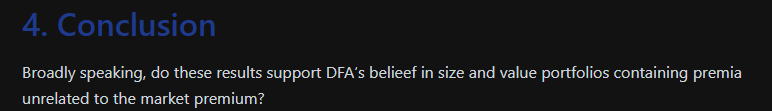

No. The results of the above anlayses show that the size and value portfolio are related to market premium in some time periods and not related in other.